<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,55.159109,68.257838,57.923477,81.805739,0.007686,273.153848,273.148080,0.005768
1,0.0,1.0,34.776321,79.814422,37.570734,26.128776,0.001730,188.291982,188.285745,0.006236
2,0.0,2.0,57.018462,41.759129,86.866942,22.932793,0.007611,218.584937,218.573508,0.011430
3,0.0,3.0,77.440165,34.045803,54.027725,70.746341,0.027666,246.287700,246.261793,0.025907
4,0.0,4.0,31.233604,56.470504,84.718897,84.134647,-0.005917,266.551735,266.559595,-0.007860
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,88.054433,66.643476,92.722026,50.616317,0.016396,308.052648,308.041005,0.011643
119996,999.0,116.0,55.934231,77.978974,50.029686,83.402148,0.003326,277.348366,277.345011,0.003355
119997,999.0,117.0,50.362569,80.072870,70.840981,59.318870,-0.020363,270.574926,270.597172,-0.022246
119998,999.0,118.0,97.622044,54.981607,35.930980,74.176681,-0.009813,272.701499,272.714374,-0.012876


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    55.159109  68.257838  57.923477  81.805739  0.007686  273.153848   
      1.0    34.776321  79.814422  37.570734  26.128776  0.001730  188.291982   
      2.0    57.018462  41.759129  86.866942  22.932793  0.007611  218.584937   
      3.0    77.440165  34.045803  54.027725  70.746341  0.027666  246.287700   
      4.0    31.233604  56.470504  84.718897  84.134647 -0.005917  266.551735   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  88.054433  66.643476  92.722026  50.616317  0.016396  308.052648   
      116.0  55.934231  77.978974  50.029686  83.402148  0.003326  277.348366   
      117.0  50.362569  80.072870  70.840981  59.318870 -0.020363  270.574926   
      118.0  97.622044  54.981607  35.930980  74.176681 -0.009813  272.701499   
      119.0  82.247330  30.417376  41.579748  60.894225 -0.023983  225.114696   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.148080  0.005768  
      1.0    188.285745  0.006236  
      2.0    218.573508  0.011430  
      3.0    246.261793  0.025907  
      4.0    266.559595 -0.007860  
...                 ...       ...  
999.0 115.0  308.041005  0.011643  
      116.0  277.345011  0.003355  
      117.0  270.597172 -0.022246  
      118.0  272.714374 -0.012876  
      119.0  225.147796 -0.033099  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    55.159109  68.257838  57.923477  81.805739  0.007686  273.153848   
      1.0    34.776321  79.814422  37.570734  26.128776  0.001730  188.291982   
      2.0    57.018462  41.759129  86.866942  22.932793  0.007611  218.584937   
      3.0    77.440165  34.045803  54.027725  70.746341  0.027666  246.287700   
      4.0    31.233604  56.470504  84.718897  84.134647 -0.005917  266.551735   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  88.054433  66.643476  92.722026  50.616317  0.016396  308.052648   
      116.0  55.934231  77.978974  50.029686  83.402148  0.003326  277.348366   
      117.0  50.362569  80.072870  70.840981  59.318870 -0.020363  270.574926   
      118.0  97.622044  54.981607  35.930980  74.176681 -0.009813  272.701499   
      119.0  82.247330  30.417376  41.579748  60.894225 -0.023983  225.114696   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.148080  0.005768  
      1.0    188.285745  0.006236  
      2.0    218.573508  0.011430  
      3.0    246.261793  0.025907  
      4.0    266.559595 -0.007860  
...                 ...       ...  
999.0 115.0  308.041005  0.011643  
      116.0  277.345011  0.003355  
      117.0  270.597172 -0.022246  
      118.0  272.714374 -0.012876  
      119.0  225.147796 -0.033099  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,55.159109,68.257838,57.923477,81.805739,0.007686,273.153848,273.148080,0.005768
1,0.0,1.0,34.776321,79.814422,37.570734,26.128776,0.001730,188.291982,188.285745,0.006236
2,0.0,2.0,57.018462,41.759129,86.866942,22.932793,0.007611,218.584937,218.573508,0.011430
3,0.0,3.0,77.440165,34.045803,54.027725,70.746341,0.027666,246.287700,246.261793,0.025907
4,0.0,4.0,31.233604,56.470504,84.718897,84.134647,-0.005917,266.551735,266.559595,-0.007860
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,88.054433,66.643476,92.722026,50.616317,0.016396,308.052648,308.041005,0.011643
119996,999.0,116.0,55.934231,77.978974,50.029686,83.402148,0.003326,277.348366,277.345011,0.003355
119997,999.0,117.0,50.362569,80.072870,70.840981,59.318870,-0.020363,270.574926,270.597172,-0.022246
119998,999.0,118.0,97.622044,54.981607,35.930980,74.176681,-0.009813,272.701499,272.714374,-0.012876


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    55.159109  68.257838  57.923477  81.805739  0.007686  273.153848   
      1.0    34.776321  79.814422  37.570734  26.128776  0.001730  188.291982   
      2.0    57.018462  41.759129  86.866942  22.932793  0.007611  218.584937   
      3.0    77.440165  34.045803  54.027725  70.746341  0.027666  246.287700   
      4.0    31.233604  56.470504  84.718897  84.134647 -0.005917  266.551735   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  88.054433  66.643476  92.722026  50.616317  0.016396  308.052648   
      116.0  55.934231  77.978974  50.029686  83.402148  0.003326  277.348366   
      117.0  50.362569  80.072870  70.840981  59.318870 -0.020363  270.574926   
      118.0  97.622044  54.981607  35.930980  74.176681 -0.009813  272.701499   
      119.0  82.247330  30.417376  41.579748  60.894225 -0.023983  225.114696   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.148080  0.005768  
      1.0    188.285745  0.006236  
      2.0    218.573508  0.011430  
      3.0    246.261793  0.025907  
      4.0    266.559595 -0.007860  
...                 ...       ...  
999.0 115.0  308.041005  0.011643  
      116.0  277.345011  0.003355  
      117.0  270.597172 -0.022246  
      118.0  272.714374 -0.012876  
      119.0  225.147796 -0.033099  

[120000 rows x 8 columns]

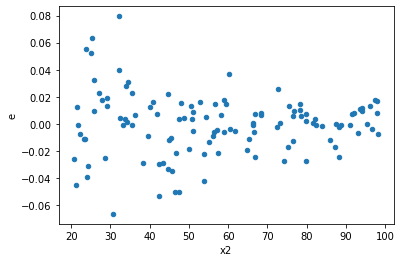

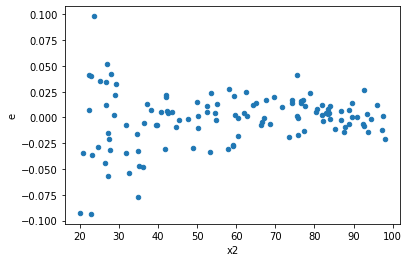

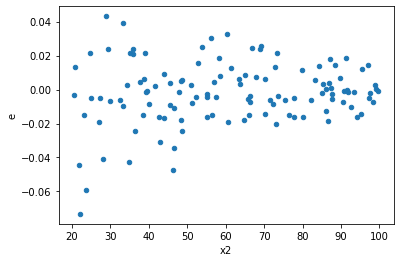

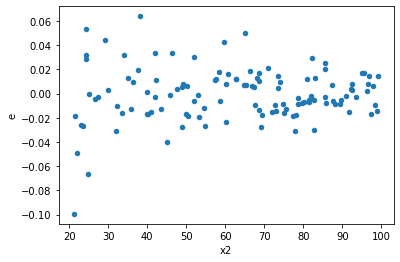

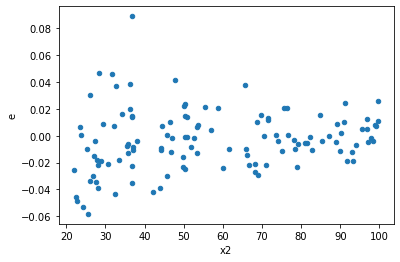

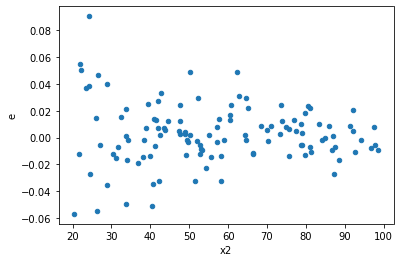

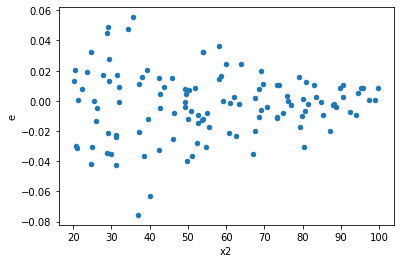

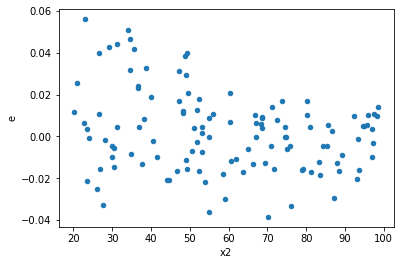

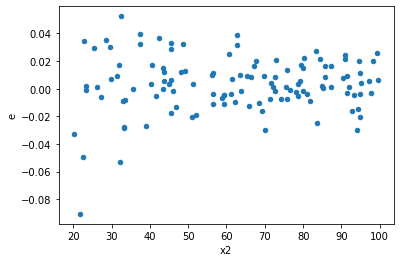

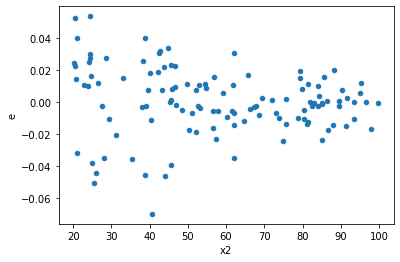

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,48.0,64.0,0.011421160145603515,0.04476315026537636,0.0002379408363667399,0.0006994242228965056,2.939487956655234,6.45825782452647e-05,0.9999677087108774,3.229128912263235e-05,Reject001=0 : Heteroscedasticity
3.0,52.0,60.0,0.012984269703480116,0.043682843272685276,0.0002496974942976945,0.0007280473878780879,2.915717636357595,8.115678534181825e-05,0.9999594216073291,4.0578392670909125e-05,Reject001=0 : Heteroscedasticity
4.0,47.0,65.0,0.013571132275986832,0.038383131409379816,0.00028874749523376237,0.0005905097139904587,2.0450730265639105,0.0076394560063872685,0.9961802719968064,0.0038197280031936343,Reject001=0 : Heteroscedasticity
6.0,49.0,63.0,0.01071876915727956,0.04375164080896956,0.000218750390964889,0.0006944704890312628,3.1747165615019646,1.9794535905504063e-05,0.9999901027320472,9.897267952752031e-06,Reject001=0 : Heteroscedasticity
7.0,67.0,45.0,0.018100336219959386,0.019405761702080648,0.0002701542719396923,0.0004312391489351255,1.5962699602669723,0.09743014474275813,0.9512849276286209,0.048715072371379065,Reject001=1 : Homoscedasticity
10.0,56.0,56.0,0.009952169525016244,0.0546497586895599,0.00017771731294671865,0.0009758885480278554,5.491240734212744,1.8036627746909062e-09,0.9999999990981686,9.018313873454531e-10,Reject001=0 : Heteroscedasticity
11.0,57.0,55.0,0.018204938208983466,0.04806816819869962,0.00031938488085935906,0.0008739666945218113,2.736405969406742,0.0002496530006215192,0.9998751734996892,0.0001248265003107596,Reject001=0 : Heteroscedasticity
12.0,50.0,62.0,0.018441921414454207,0.025308985100406713,0.0003688384282890841,0.0004082094371033341,1.1067432398431982,0.6996167866321981,0.650191606683901,0.34980839331609903,Reject001=1 : Homoscedasticity
14.0,65.0,47.0,0.017635611074651385,0.03224427870421478,0.0002713170934561752,0.0006860484830683995,2.5285855540068076,0.001107635094529158,0.9994461824527354,0.000553817547264579,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,48.0,64.0,0.011421160145603515,0.04476315026537636,0.0002379408363667399,0.0006994242228965056,2.939487956655234,6.45825782452647e-05,Reject001=0 : Heteroscedasticity
1.0,58.0,54.0,0.05074562708778599,0.020332830015009386,0.0008749246049618274,0.0003765338891668405,0.4303615271892697,0.0018561006691561318,Reject001=0 : Heteroscedasticity
2.0,50.0,62.0,0.023133608396467772,0.013923602406011057,0.00046267216792935544,0.00022457423235501704,0.48538522072783696,0.009142530080178776,Reject001=0 : Heteroscedasticity
3.0,52.0,60.0,0.012984269703480116,0.043682843272685276,0.0002496974942976945,0.0007280473878780879,2.915717636357595,8.115678534181825e-05,Reject001=0 : Heteroscedasticity
4.0,47.0,65.0,0.013571132275986832,0.038383131409379816,0.00028874749523376237,0.0005905097139904587,2.0450730265639105,0.0076394560063872685,Reject001=0 : Heteroscedasticity
5.0,54.0,58.0,0.03338035740816319,0.023692719765099752,0.0006181547668178369,0.0004084951683637888,0.6608299252736616,0.12607493816015558,Reject001=1 : Homoscedasticity
6.0,49.0,63.0,0.01071876915727956,0.04375164080896956,0.000218750390964889,0.0006944704890312628,3.1747165615019646,1.9794535905504063e-05,Reject001=0 : Heteroscedasticity
7.0,67.0,45.0,0.018100336219959386,0.019405761702080648,0.0002701542719396923,0.0004312391489351255,1.5962699602669723,0.09743014474275813,Reject001=1 : Homoscedasticity
8.0,55.0,57.0,0.027480222692101302,0.0137250803592356,0.00049964041258366,0.0002407908834953614,0.48192835773676185,0.007312870687576793,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    532
Reject001=1 : Homoscedasticity      468
Name: Result_test, dtype: int64